In [1]:
import numpy as np
from scipy.special import expi
import matplotlib.pyplot as plt
from circuit_toolkit.plot_utils import saveallforms
figdir = '/n/home12/binxuwang/Github/DiffusionLearningCurve/figures'

/n/home12/binxuwang/Github/circuit_toolkit/circuit_toolkit/GAN_invert_utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [2]:
def find_element_after_threshold_cumprod(arr, minval, maxval=np.inf):
    # Create a boolean array where True indicates elements greater than the threshold
    bool_arr = (arr > minval) & (arr < maxval)
    # Compute the cumulative product from right to left
    cumprod_arr = np.cumprod(bool_arr[::-1])[::-1]
    # Find the index where cumprod_arr becomes 1 for the first time
    index = np.argmax(cumprod_arr == 1)
    # If such an index exists and is valid, return the element
    if cumprod_arr[index] == 1:
        return index
    else:
        return None  # If no such element is found

## One layer linear network

In [79]:
import numpy as np
from scipy.special import expi
import matplotlib.pyplot as plt

def eval_learning_spec_func(lambdak, sigma0, sigmaT, eta, tau):
    exp_term0 = expi(-2 * eta * tau * sigma0**2) * np.exp(-2 * eta * tau * lambdak)
    exp_term1 = expi(-2 * eta * tau * (sigma0**2 + lambdak))
    numerator = np.exp(0.5 * (exp_term0 - exp_term1))
    
    exp_term2 = expi(-2 * eta * tau * sigmaT**2) * np.exp(-2 * eta * tau * lambdak)
    exp_term3 = expi(-2 * eta * tau * (sigmaT**2 + lambdak))
    denominator = np.exp(0.5 * (exp_term2 - exp_term3))
    
    result = numerator / denominator
    return result


def eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau):
    term1 = np.sqrt((lambdak + sigma0**2) / (lambdak + sigmaT**2))
    spec_func = eval_learning_spec_func(lambdak, sigma0, sigmaT, eta, tau)
    result = term1 * spec_func
    return result

# Example parameters
lambdak = 0.1
sigma0 = 0.0001
sigmaT = 100
eta = 0.1
tau = 1000

eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau) * np.sqrt(sigmaT**2)

0.3162261966283199

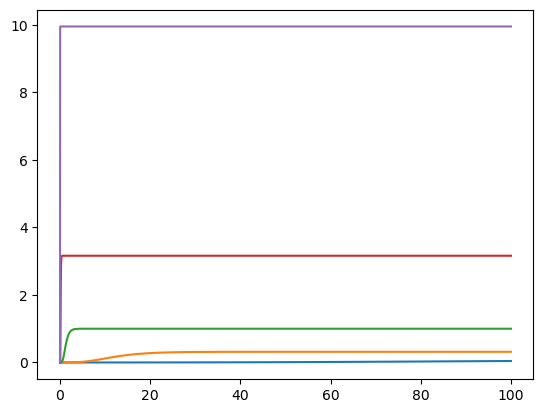

In [32]:
# lambdak = 10
sigma0 = 0.0001
sigmaT = 100
eta = 1
# tau = 1000
tau_curve = np.logspace(-3, 2, 100)
plt.figure()
for lambdak in [0.01, 0.1, 1, 10, 100]:
    var_curve = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve) * np.sqrt(sigmaT**2)
    plt.plot(tau_curve, var_curve)
    
plt.show()

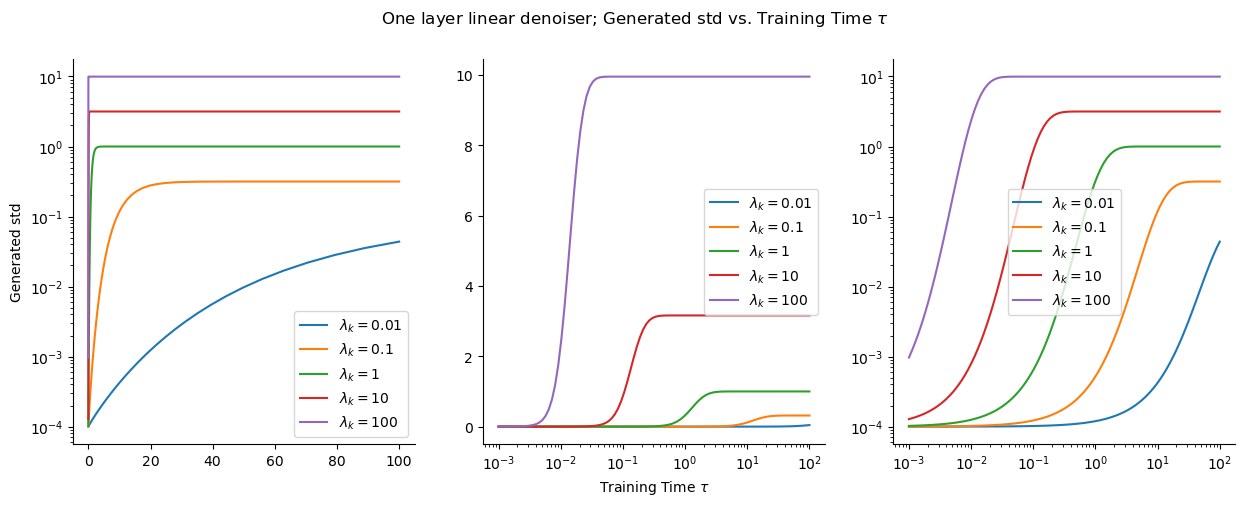

In [187]:
# lambdak = 10
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        std_curve = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve) * np.sqrt(sigmaT**2)
        plot_fun(tau_curve, std_curve, label="$\lambda_k = {}$".format(lambdak))
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("Generated std")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle("One layer linear denoiser; Generated std vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_gen_std', figh)
plt.show()

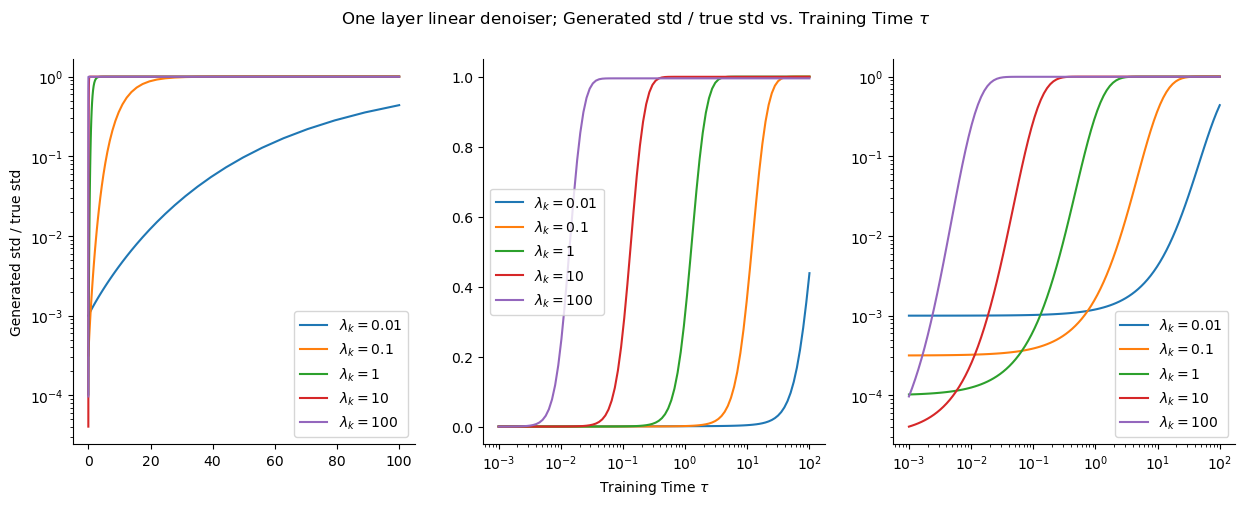

In [188]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        std_ratio_curve = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve) * sigmaT / np.sqrt(lambdak)
        plot_fun(tau_curve, std_ratio_curve, label="$\lambda_k = {}$".format(lambdak))
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("Generated std / true std")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle("One layer linear denoiser; Generated std / true std vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_gen_std_ratio', figh)
plt.show()

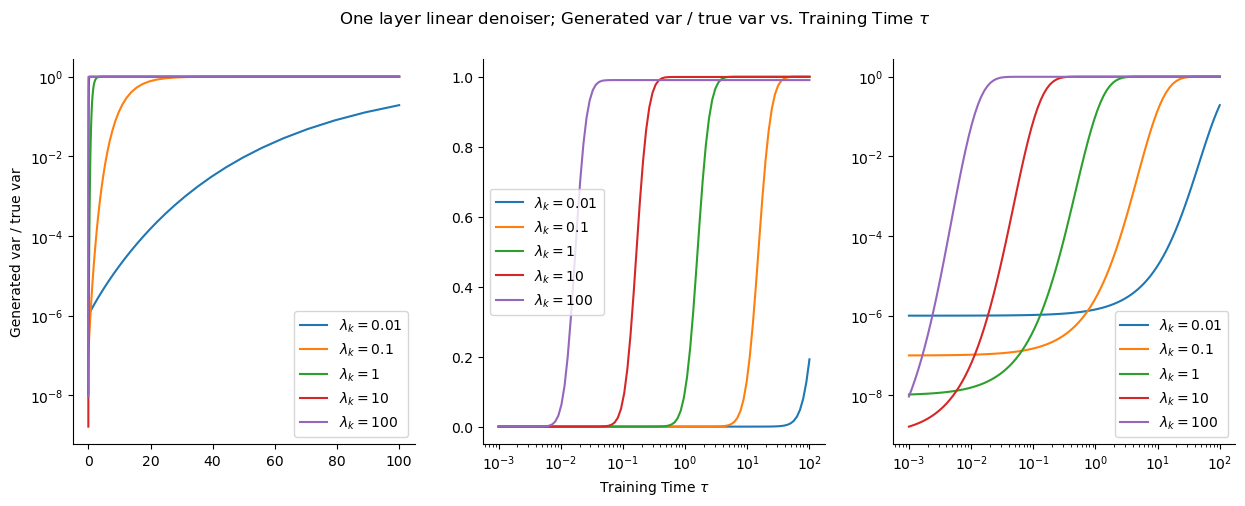

In [189]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        std_ratio_curve = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve) * sigmaT / np.sqrt(lambdak)
        plot_fun(tau_curve, std_ratio_curve ** 2, label="$\lambda_k = {}$".format(lambdak))
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("Generated var / true var")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle("One layer linear denoiser; Generated var / true var vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_gen_var_ratio', figh)
plt.show()

lambda_k = 0.01, tau = 200.752
lambda_k = 0.03, tau = 68.386
lambda_k = 0.1, tau = 21.012
lambda_k = 0.3, tau = 7.112
lambda_k = 1, tau = 2.171
lambda_k = 3, tau = 0.735
lambda_k = 10, tau = 0.224
lambda_k = 30, tau = 0.076
lambda_k = 100, tau = 0.023


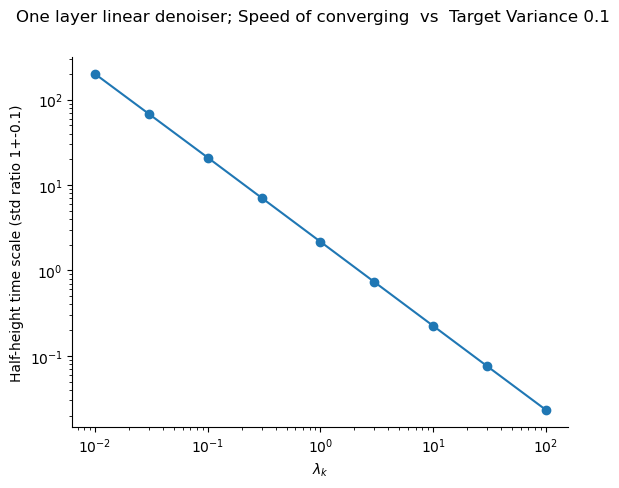

In [216]:
# print the learning time scale for each feature
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-4, 3, 5000)
eps = 0.1
var_half_height_dict = {}
# for lambdak in [0.01, 0.1, 1, 10, 100]:
for lambdak in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]:
    std_ratio_curve = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve) * sigmaT / np.sqrt(lambdak)
    # find the point where var_ratio > 0.5
    # idx = np.argmax(std_ratio_curve > thresh)  
    idx = find_element_after_threshold_cumprod(std_ratio_curve, minval=1 - eps, maxval=1 + eps)
    threshheight_tau = tau_curve[idx]
    print(f"lambda_k = {lambdak}, tau = {tau_curve[idx]:.3f}")
    var_half_height_dict[lambdak] = threshheight_tau
    
figh = plt.figure()
plt.plot(var_half_height_dict.keys(), var_half_height_dict.values(), 'o-')
plt.xlabel("$\lambda_k$")
plt.ylabel(f"Half-height time scale (std ratio 1+-{eps})")
plt.xscale('log')
plt.yscale('log')
plt.suptitle(f"One layer linear denoiser; Speed of converging  vs  Target Variance {eps}")
saveallforms(figdir, f'onelayer_linear_diffusion_gen_learning_speed_eps{eps}', figh)
plt.show()

### KL divergence of distribution

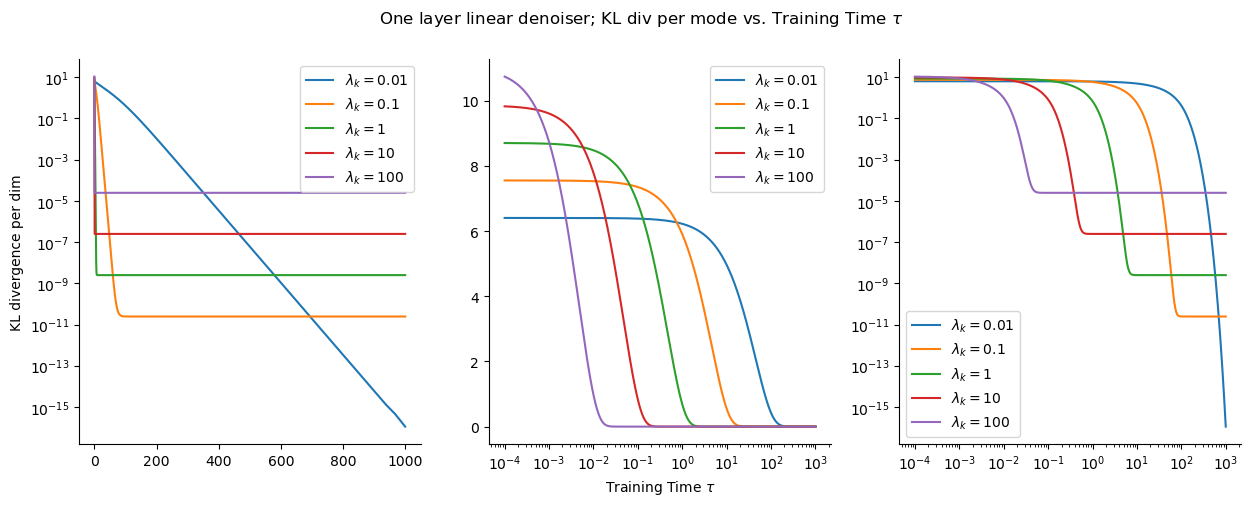

In [194]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        var_ratio = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve)**2 * sigmaT**2 / lambdak
        KL_k = (var_ratio - np.log(var_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\lambda_k = {}$".format(lambdak))
    #     KL_sum += KL_k
    # plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle("One layer linear denoiser; KL div per mode vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_KL_per_mode', figh)
plt.show()

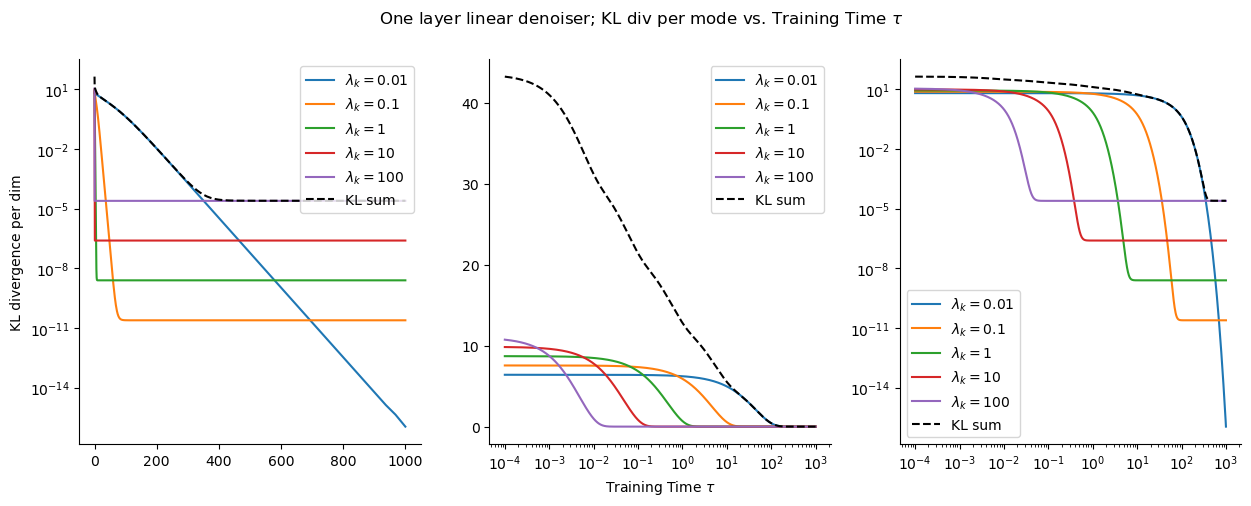

In [195]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        var_ratio = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve)**2 * sigmaT**2 / lambdak
        KL_k = (var_ratio - np.log(var_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\lambda_k = {}$".format(lambdak))
        KL_sum += KL_k
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
    plt.legend()    
plt.suptitle("One layer linear denoiser; KL div per mode vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_KL_per_mode_with_sum', figh)
plt.show()

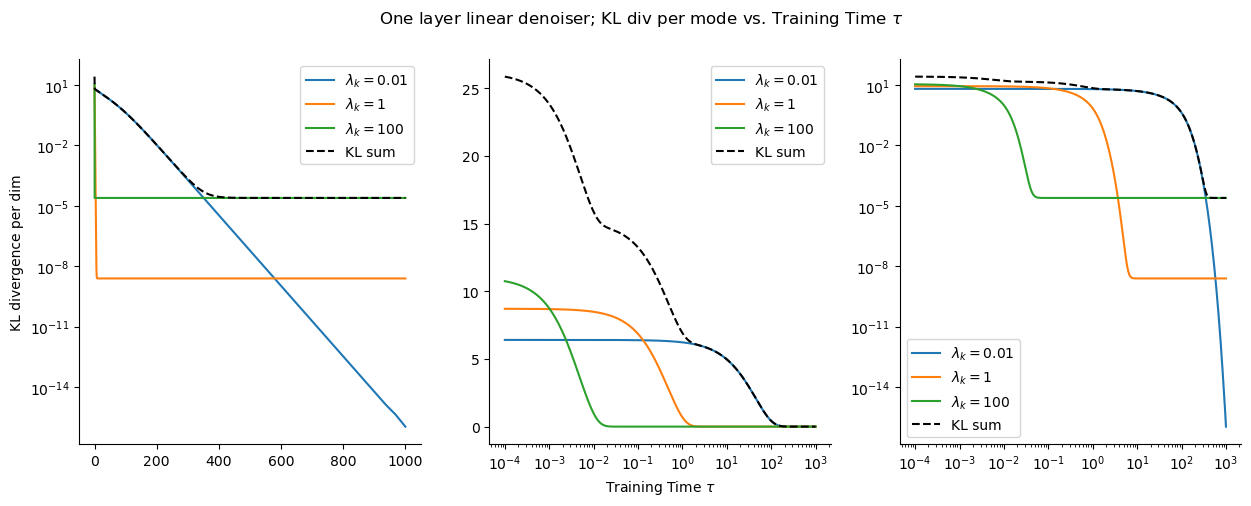

In [197]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 1, 100]:
        var_ratio = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve)**2 * sigmaT**2 / lambdak
        KL_k = (var_ratio - np.log(var_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\lambda_k = {}$".format(lambdak))
        KL_sum += KL_k
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
    plt.legend()    
plt.suptitle("One layer linear denoiser; KL div per mode vs. Training Time $\\tau$")
saveallforms(figdir, f'onelayer_linear_lrncrv_diffusion_KL_per_mode_with_sum2', figh)
plt.show()

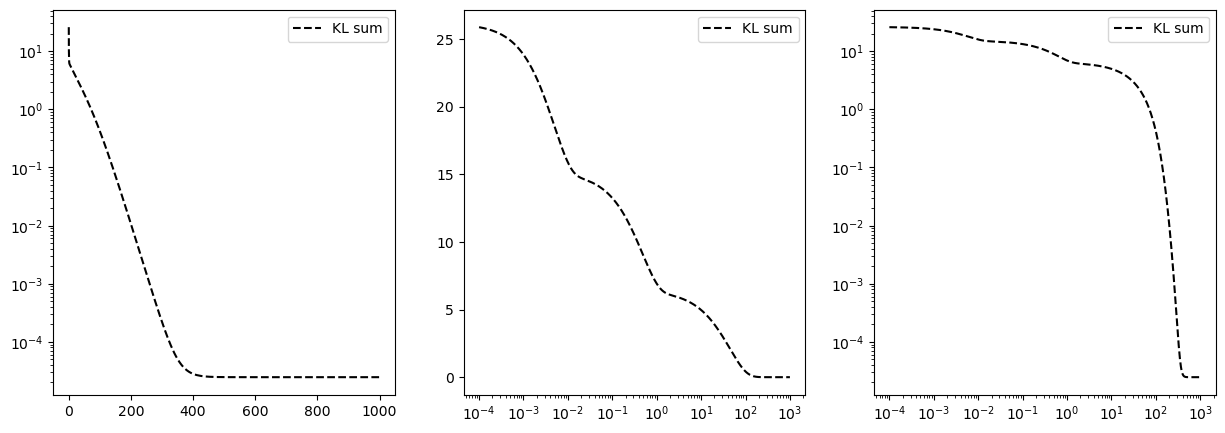

In [98]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-4, 3, 1000)
KL_sum = np.zeros_like(tau_curve)
for lambdak in [0.01, 1, 100]:
    var_ratio = eval_scaling_factor(lambdak, sigma0, sigmaT, eta, tau_curve)**2 * sigmaT**2 / lambdak
    KL_k = (var_ratio - np.log(var_ratio) - 1) / 2  
    KL_sum += KL_k
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    plt.legend()    
plt.show()

## Two layer dynamics

In [4]:
import numpy as np

def eval_scaling_factor_2symmlayer(lambda_k, eta, tau, Q_k, sigma_0, sigma_T):
    exp_term = np.exp(-8 * eta * tau * lambda_k)
    
    numerator = lambda_k * exp_term + Q_k * (1 - exp_term) * (lambda_k + sigma_0**2)
    denominator = lambda_k * exp_term + Q_k * (1 - exp_term) * (lambda_k + sigma_T**2)
    
    ratio = numerator / denominator
    
    power_denominator = 2 * Q_k + 2 * (1 - Q_k) * exp_term
    power_term = Q_k / power_denominator
    log_term = (2 * (1 - Q_k) * exp_term) / power_denominator
    sigma_ratio_term = (sigma_0 / sigma_T) ** log_term
    
    result = np.power(ratio, power_term) * sigma_ratio_term
    return result

# Example usage
lambda_k = 1.0
eta = 1
tau = 1000
Q_k = 0.01
sigma_0 = 0.001
sigma_T = 100

result = eval_scaling_factor_2symmlayer(lambda_k, eta, tau, Q_k, sigma_0, sigma_T)
print(result)

0.009999505037245643


In [125]:
lambda_k = 10.0
eta = 1
tau = 1000
Q_k = 0.01
sigma_0 = 0.001
sigma_T = 100

variance = eval_scaling_factor_2symmlayer(lambda_k, eta, tau, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
print(variance)

9.990010989010987


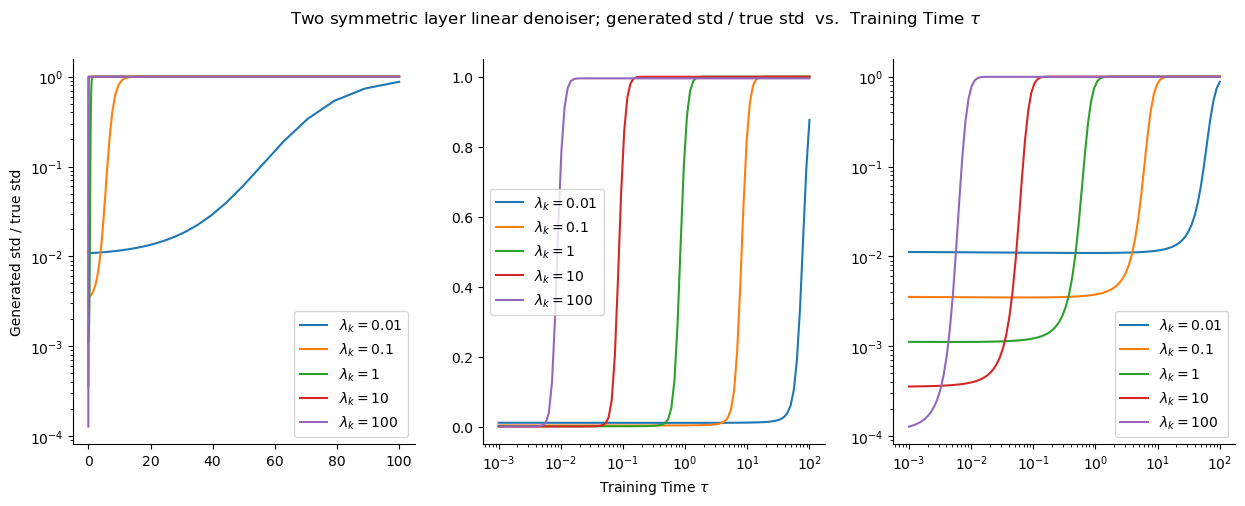

In [198]:
sigma0 = 0.0001
sigmaT = 100
eta = 1
Q_k = 0.01
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        std_curve = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) * sigma_T
        std_ratio_curve = std_curve / np.sqrt(lambdak)
        plot_fun(tau_curve, std_ratio_curve, label="$\\lambda_k = {}$".format(lambdak))
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("Generated std / true std")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle("Two symmetric layer linear denoiser; generated std / true std  vs.  Training Time $\\tau$")
saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_gen_std_ratio', figh) 
plt.show()

Small initialization of $W$ will result in monotonic dynamics

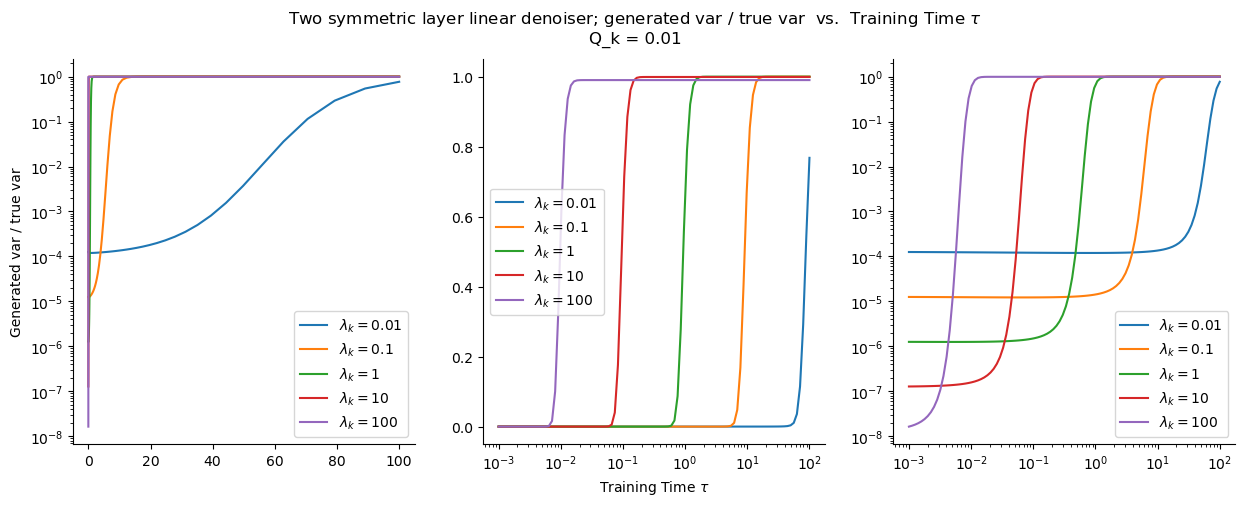

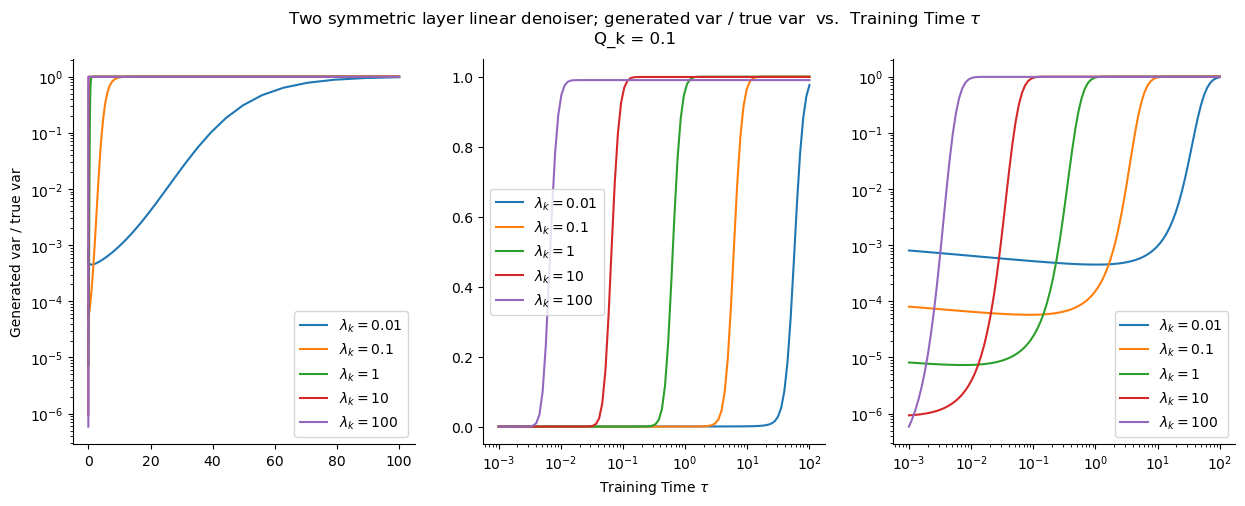

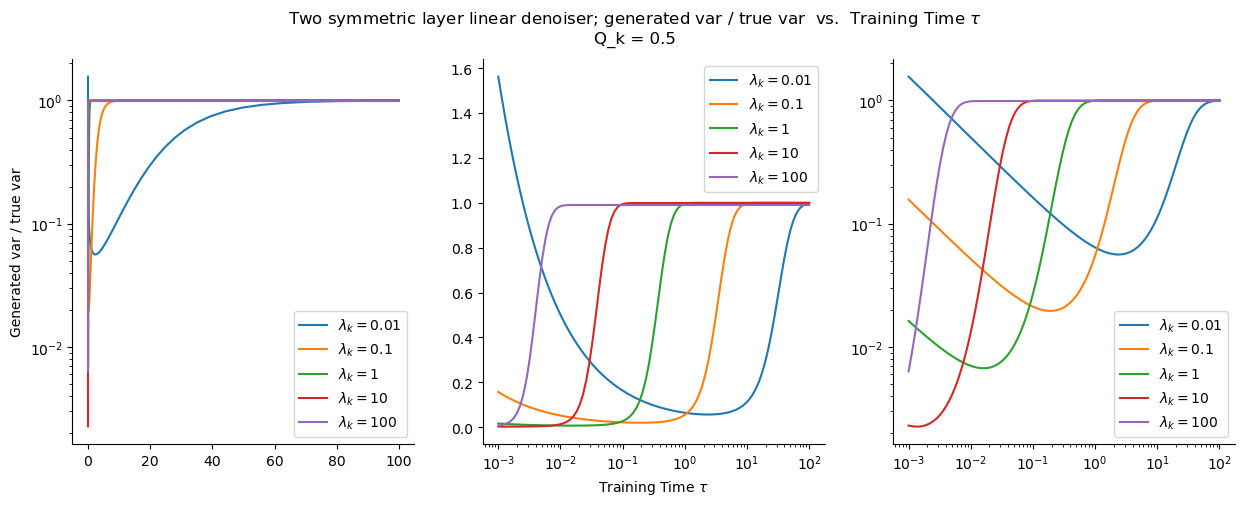

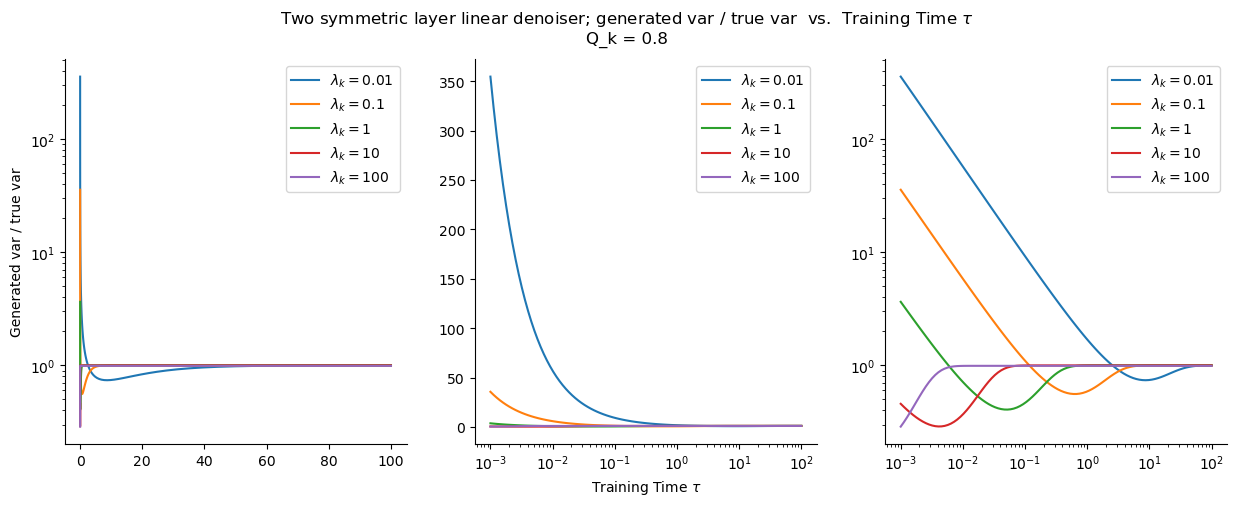

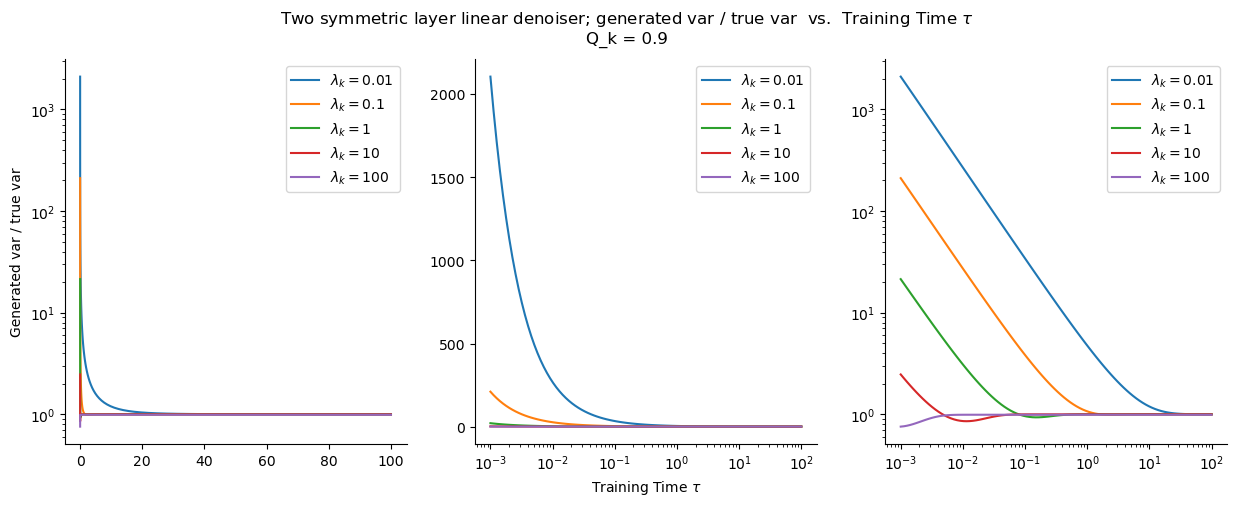

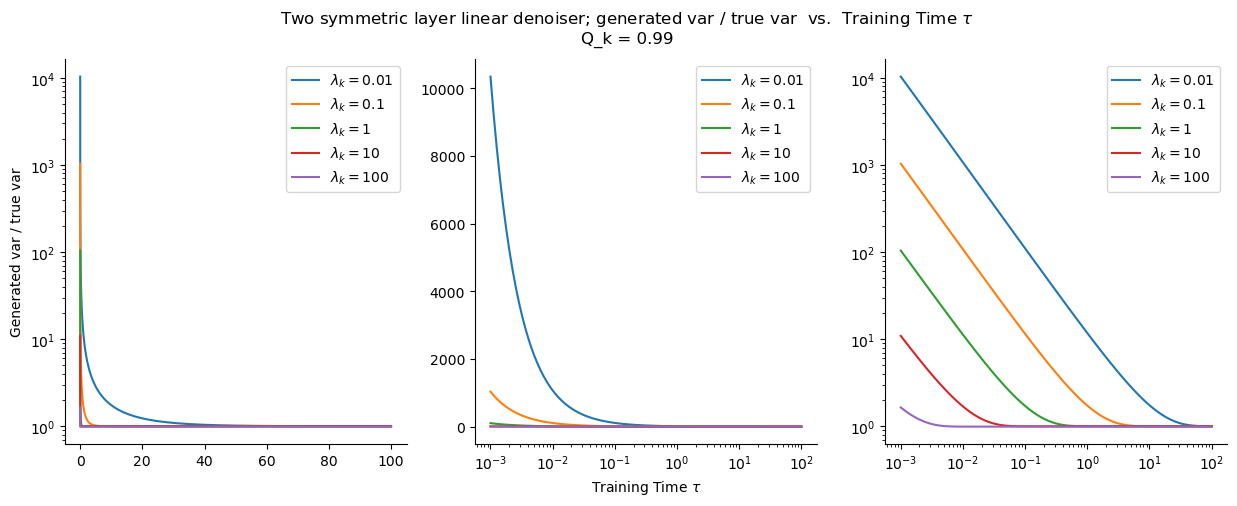

In [5]:
Q_k = 0.01
for Q_k in [0.01, 0.1, 0.5, 0.8, 0.9, 0.99]:
    sigma0 = 0.0001
    sigmaT = 100
    eta = 1
    tau_curve = np.logspace(-3, 2, 100)
    figh, axs = plt.subplots(1, 3, figsize=(15,5))
    for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
        plt.sca(ax)
        for lambdak in [0.01, 0.1, 1, 10, 100]:
            variance = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
            variance_ratio = variance / lambdak
            plot_fun(tau_curve, variance_ratio, label="$\\lambda_k = {}$".format(lambdak))
        plt.legend()    
        if ax == axs[0]:
            plt.ylabel("Generated var / true var")
        if ax == axs[1]:
            plt.xlabel("Training Time $\\tau$")
    plt.suptitle(f"Two symmetric layer linear denoiser; generated var / true var  vs.  Training Time $\\tau$ \nQ_k = {Q_k}")
    saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_var_ratio_Qinit{Q_k}', figh) 
    plt.show()

Note that if the initialization of $W$ is larger, it will induce non monotonic dynamics!

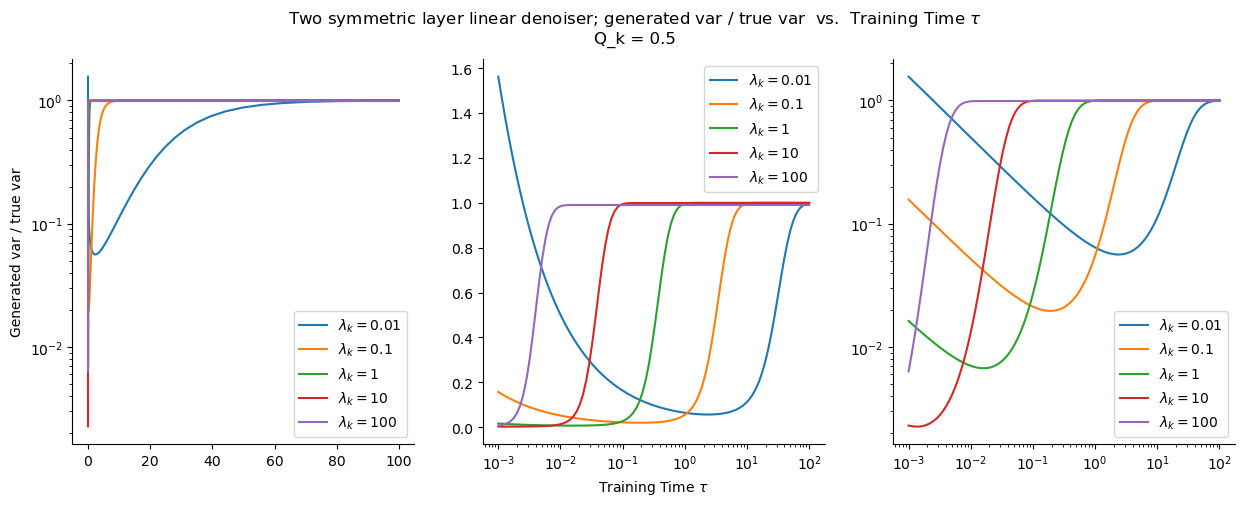

In [201]:
Q_k = 0.5

sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        variance = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
        variance_ratio = variance / lambdak
        plot_fun(tau_curve, variance_ratio, label="$\\lambda_k = {}$".format(lambdak))
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("Generated var / true var")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle(f"Two symmetric layer linear denoiser; generated var / true var  vs.  Training Time $\\tau$ \nQ_k = {Q_k}")
saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_var_ratio_Qinit{Q_k}', figh) 
plt.show()

lambda_k = 0.01, tau = 47.483
lambda_k = 0.03, tau = 16.430
lambda_k = 0.1, tau = 5.109
lambda_k = 0.3, tau = 1.748
lambda_k = 1, tau = 0.540
lambda_k = 3, tau = 0.183
lambda_k = 10, tau = 0.056
lambda_k = 30, tau = 0.019
lambda_k = 100, tau = 0.006


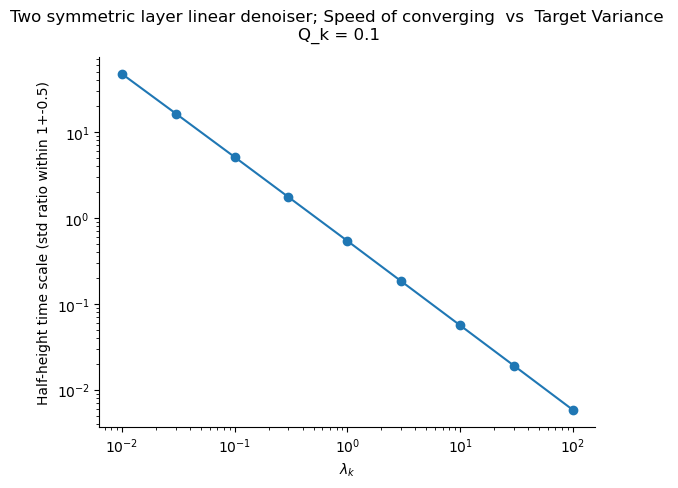

In [224]:
# print the learning time scale for each feature
Q_k = 0.1

sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-5, 3, 5000)
eps = 0.5
var_half_height_dict = {}
for lambdak in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]:
    std_curve = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) * sigma_T
    std_ratio_curve = std_curve / np.sqrt(lambdak)
    # find the point where var_ratio > 0.5
    # note this has bug in it... cannot handle non-monotonic curves
    # idx = np.argmax(std_ratio_curve > thresh)
    # instead, find the point where var_ratio > 0.5 and keep > 0.5 after that
    idx = find_element_after_threshold_cumprod(std_ratio_curve, minval=1 - eps, maxval=1 + eps)
    threshheight_tau = tau_curve[idx]
    print(f"lambda_k = {lambdak}, tau = {tau_curve[idx]:.3f}")
    var_half_height_dict[lambdak] = threshheight_tau
    
figh = plt.figure()
plt.plot(var_half_height_dict.keys(), var_half_height_dict.values(), 'o-')
plt.xlabel("$\lambda_k$")
plt.ylabel(f"Half-height time scale (std ratio within 1+-{eps})")
plt.xscale('log')
plt.yscale('log')
plt.suptitle(f"Two symmetric layer linear denoiser; Speed of converging  vs  Target Variance \nQ_k = {Q_k}")
saveallforms(figdir, f'twosymmlayer_linear_diffusion_gen_learning_speed_Qinit{Q_k}_eps{eps}', figh) 
plt.show()

### KL divergence of distribution

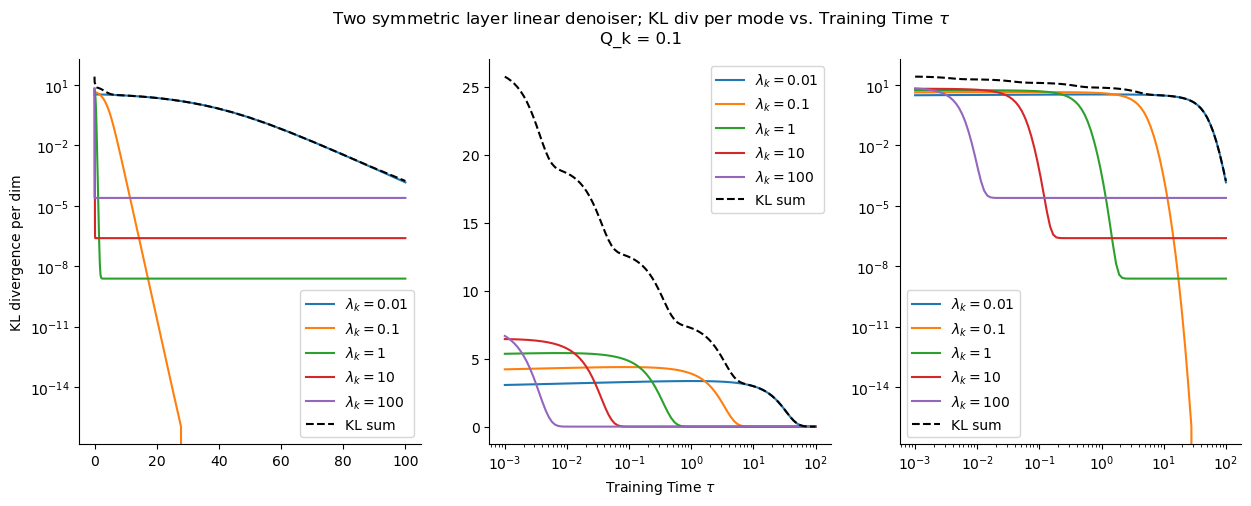

In [205]:
Q_k = 0.1

sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        variance = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
        variance_ratio = variance / lambdak
        KL_k = (variance_ratio - np.log(variance_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\\lambda_k = {}$".format(lambdak))
        KL_sum += KL_k
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
        
plt.suptitle(f"Two symmetric layer linear denoiser; KL div per mode vs. Training Time $\\tau$ \nQ_k = {Q_k}")
saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_KL_per_mode_Qinit{Q_k}', figh) 
plt.show()

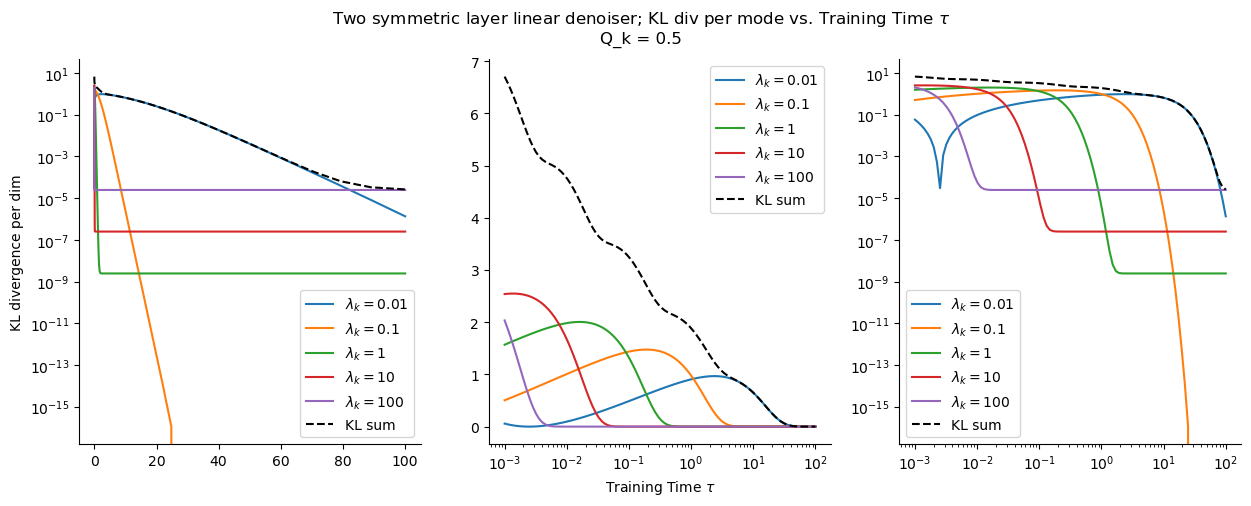

In [206]:
Q_k = 0.5

sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        variance = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
        variance_ratio = variance / lambdak
        KL_k = (variance_ratio - np.log(variance_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\\lambda_k = {}$".format(lambdak))
        KL_sum += KL_k
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle(f"Two symmetric layer linear denoiser; KL div per mode vs. Training Time $\\tau$ \nQ_k = {Q_k}")
saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_KL_per_mode_Qinit{Q_k}', figh) 
plt.show()

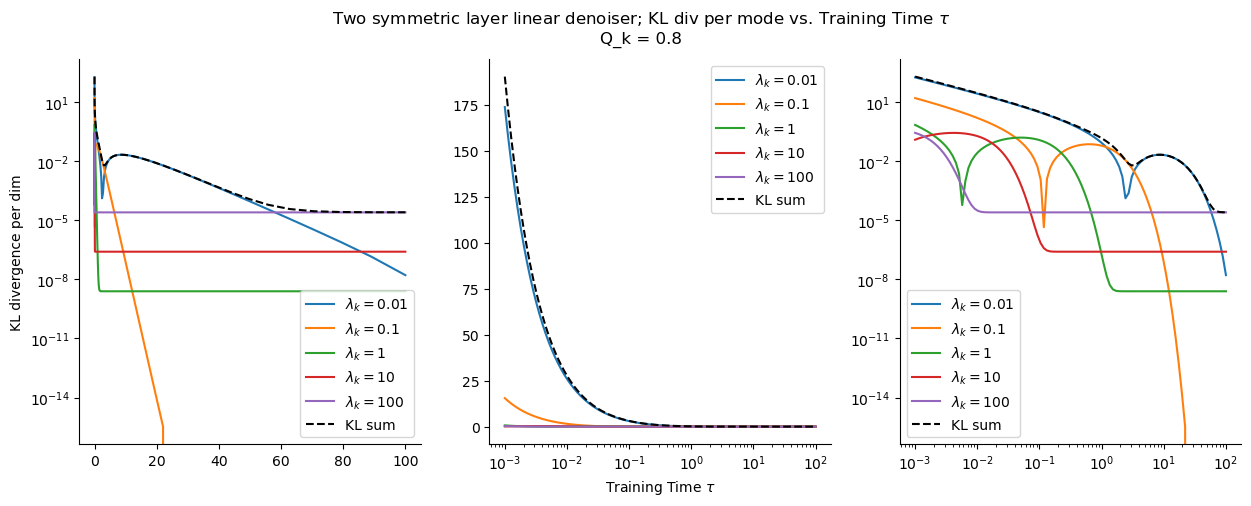

In [207]:
Q_k = 0.8

sigma0 = 0.0001
sigmaT = 100
eta = 1
tau_curve = np.logspace(-3, 2, 100)
figh, axs = plt.subplots(1, 3, figsize=(15,5))
for ax, plot_fun in zip(axs, [plt.semilogy, plt.semilogx, plt.loglog]):
    plt.sca(ax)
    KL_sum = np.zeros_like(tau_curve)
    for lambdak in [0.01, 0.1, 1, 10, 100]:
        variance = eval_scaling_factor_2symmlayer(lambdak, eta, tau_curve, Q_k, sigma_0, sigma_T) ** 2 * sigma_T**2
        variance_ratio = variance / lambdak
        KL_k = (variance_ratio - np.log(variance_ratio) - 1) / 2  
        plot_fun(tau_curve, KL_k, label="$\\lambda_k = {}$".format(lambdak))
        KL_sum += KL_k
    plot_fun(tau_curve, KL_sum, label="KL sum", linestyle="--", color="black")
    plt.legend()    
    if ax == axs[0]:
        plt.ylabel("KL divergence per dim")
    if ax == axs[1]:
        plt.xlabel("Training Time $\\tau$")
plt.suptitle(f"Two symmetric layer linear denoiser; KL div per mode vs. Training Time $\\tau$ \nQ_k = {Q_k}")
saveallforms(figdir, f'twosymmlayer_linear_lrncrv_diffusion_KL_per_mode_Qinit{Q_k}', figh) 
plt.show()

## Appendix, property of Expi function 

In [ ]:
import math
import numpy as np
from scipy.special import expi, exp1

print(expi(-1))
print(exp1(1))

-0.21938393439552062
0.21938393439552062


In [ ]:
def E1_approx(z, k_max):
    # Euler-Mascheroni constant
    gamma = np.euler_gamma
    
    # Calculate the series sum
    series_sum = np.sum([((-z)**k) / (k * math.factorial(k)) for k in range(1, k_max + 1)])
    
    # Calculate the approximate value of E1(z)
    E1_z = -gamma - np.log(z) - series_sum
    
    return E1_z

# Example usage
z = 100.0  # Example value for z
k_max = 20  # Cutoff for the series
result = E1_approx(z, k_max)
precise_result = -expi(-z)
print(f"E1({z}) ≈ {result} with k_max = {k_max}")
print (f"precise result: {precise_result}")

E1(100.0) ≈ -1.6952776668407723e+20 with k_max = 20
precise result: 3.683597761682032e-46


In [ ]:
print(np.euler_gamma + np.log(0.002))
print(expi(-0.002))

-5.637392433520659
-5.639391433964937
